In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
stop_words_sp = get_stop_words('spanish')

In [3]:
from nltk import SnowballStemmer
from nltk.tokenize import word_tokenize

def stemm_text(text):
    """
    Stemm text using nltk stemmer (Snowball) for spanish
    :param text:
    :return:
    """
    stemm_sp = SnowballStemmer('spanish')
    tokens = word_tokenize(text, "spanish")
    stems = [stemm_sp.stem(token) for token in tokens]
    return stems

In [4]:
#carga de pdfs limpios 
pdfs_limpios_1=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\pdfs_limpios.pkl','rb'))
pdfs_limpios_2=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\pdfs_limpios_epn_amlo.pkl','rb'))

In [5]:
pdfs_limpios=pdfs_limpios_1 + pdfs_limpios_2

In [6]:
stop_words_sp = get_stop_words('spanish')

In [7]:
palabras_extra=['mexican','par','mexic','nuestr','mas','par','tod','pais']

In [8]:
stop_words_sp.extend(palabras_extra)

In [9]:
#Config del Count vectorizer
cv = CountVectorizer(strip_accents='unicode', lowercase=True, stop_words=stop_words_sp, analyzer="word", tokenizer=stemm_text, max_features=50)

In [10]:
cv1 = CountVectorizer(strip_accents='unicode', lowercase=True, stop_words=stop_words_sp, analyzer="word", tokenizer=stemm_text)

In [11]:
m0 = cv1.fit_transform(pdfs_limpios)

C:\Users\HIDEv\anaconda3\envs\itam_md\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sid', 'siend', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  warnings.warn('Your stop

In [12]:
counts = pd.DataFrame(m0.toarray(),
                      columns=cv1.get_feature_names())

In [13]:
m1 = cv.fit_transform(pdfs_limpios[0:9])
m2 = cv.fit_transform(pdfs_limpios[9:19])
m3 = cv.fit_transform(pdfs_limpios[19:29])
m4 = cv.fit_transform(pdfs_limpios[29:39])
m5 = cv.fit_transform(pdfs_limpios[39:49])
m6 = cv.fit_transform(pdfs_limpios[49:59])
m7 = cv.fit_transform(pdfs_limpios[59:69])
m8 = cv.fit_transform(pdfs_limpios[69:80])

In [14]:
counts1 = pd.DataFrame(m1.toarray(),
                      columns=cv.get_feature_names())
counts2 = pd.DataFrame(m2.toarray(),
                      columns=cv.get_feature_names())
counts3 = pd.DataFrame(m3.toarray(),
                      columns=cv.get_feature_names())
counts4 = pd.DataFrame(m4.toarray(),
                      columns=cv.get_feature_names())
counts5 = pd.DataFrame(m5.toarray(),
                      columns=cv.get_feature_names())
counts6 = pd.DataFrame(m6.toarray(),
                      columns=cv.get_feature_names())
counts7 = pd.DataFrame(m7.toarray(),
                      columns=cv.get_feature_names())
counts8 = pd.DataFrame(m8.toarray(),
                      columns=cv.get_feature_names())

In [15]:
plot_counts1=pd.DataFrame({'Palabra':counts1.sum(axis=0).index , 'Frecuencia':counts1.sum(axis=0).values})
plot_counts2=pd.DataFrame({'Palabra':counts2.sum(axis=0).index , 'Frecuencia':counts2.sum(axis=0).values})
plot_counts3=pd.DataFrame({'Palabra':counts3.sum(axis=0).index , 'Frecuencia':counts3.sum(axis=0).values})
plot_counts4=pd.DataFrame({'Palabra':counts4.sum(axis=0).index , 'Frecuencia':counts4.sum(axis=0).values})
plot_counts5=pd.DataFrame({'Palabra':counts5.sum(axis=0).index , 'Frecuencia':counts5.sum(axis=0).values})
plot_counts6=pd.DataFrame({'Palabra':counts6.sum(axis=0).index , 'Frecuencia':counts6.sum(axis=0).values})
plot_counts7=pd.DataFrame({'Palabra':counts7.sum(axis=0).index , 'Frecuencia':counts7.sum(axis=0).values})
plot_counts8=pd.DataFrame({'Palabra':counts8.sum(axis=0).index , 'Frecuencia':counts8.sum(axis=0).values})

Text(0.5, 1.0, 'Top 50 palabras 1941-1949')

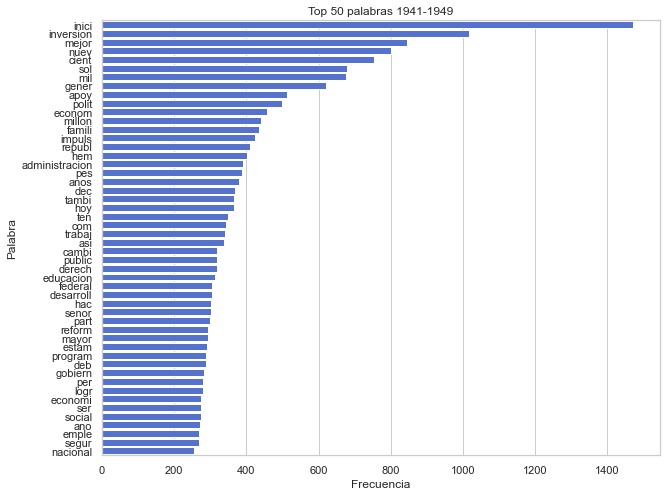

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax1=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts1.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax1.set_title('Top 50 palabras 1941-1949')

Text(0.5, 1.0, 'Top 50 palabras 1950-1959')

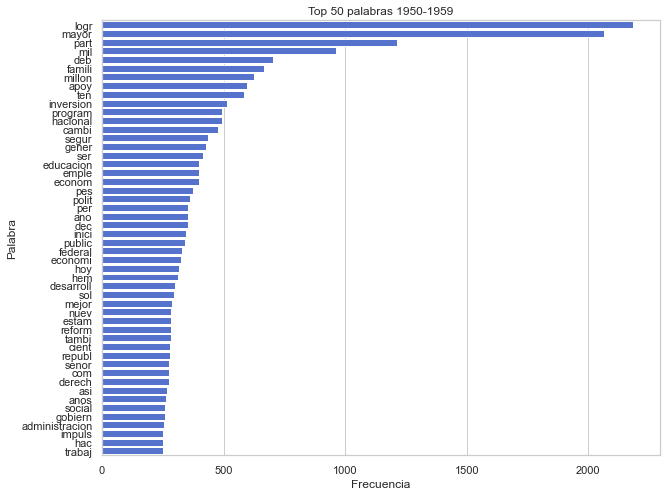

In [17]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax2=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts2.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax2.set_title('Top 50 palabras 1950-1959')

Text(0.5, 1.0, 'Top 50 palabras 1960-1969')

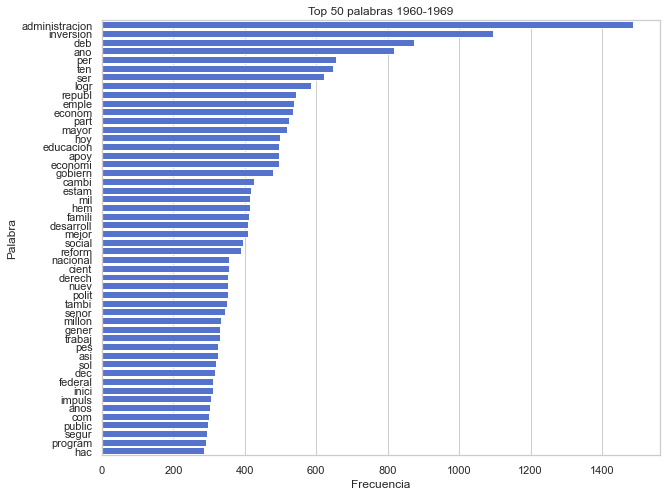

In [18]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax3=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts3.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax3.set_title('Top 50 palabras 1960-1969')

Text(0.5, 1.0, 'Top 50 palabras 1970-1979')

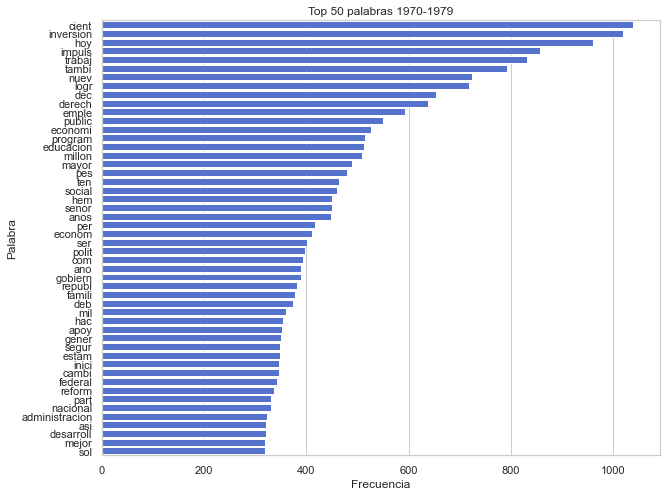

In [19]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax4=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts4.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax4.set_title('Top 50 palabras 1970-1979')

Text(0.5, 1.0, 'Top 50 palabras 1980-1989')

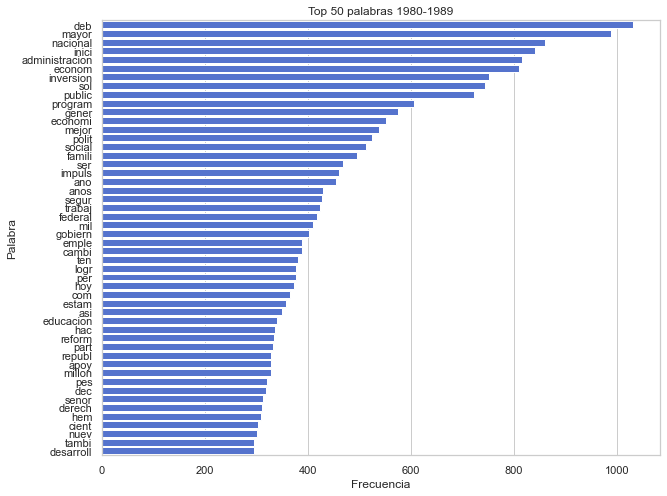

In [20]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax5=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts5.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax5.set_title('Top 50 palabras 1980-1989')

Text(0.5, 1.0, 'Top 50 palabras 1990-1999')

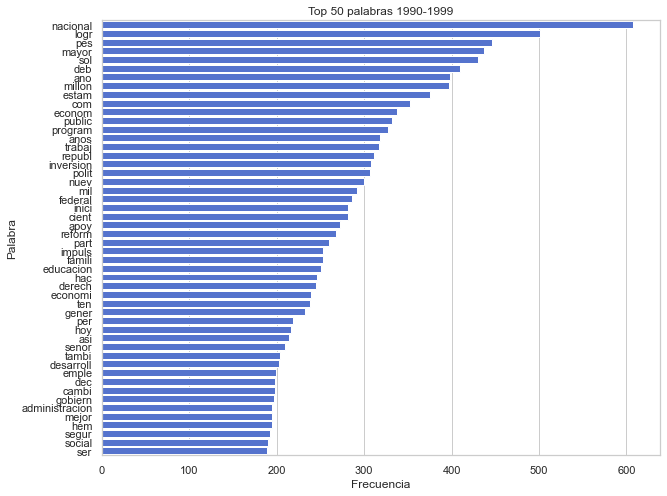

In [21]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax6=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts6.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax6.set_title('Top 50 palabras 1990-1999')

Text(0.5, 1.0, 'Top 50 palabras 2000-2010')

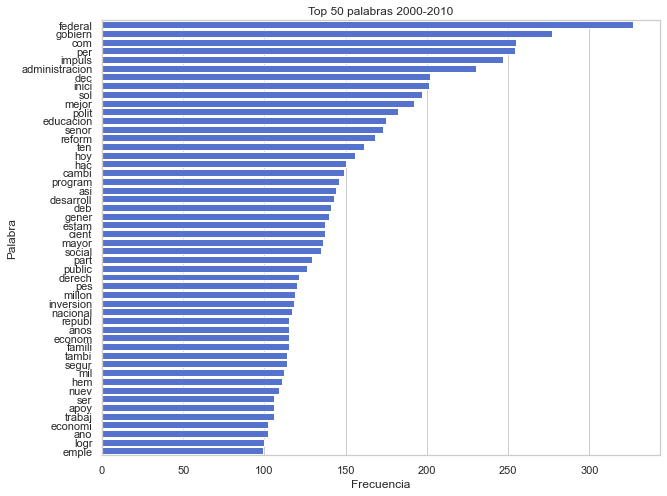

In [22]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax7=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts7.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax7.set_title('Top 50 palabras 2000-2010')

Text(0.5, 1.0, 'Top 50 palabras 2010-2021')

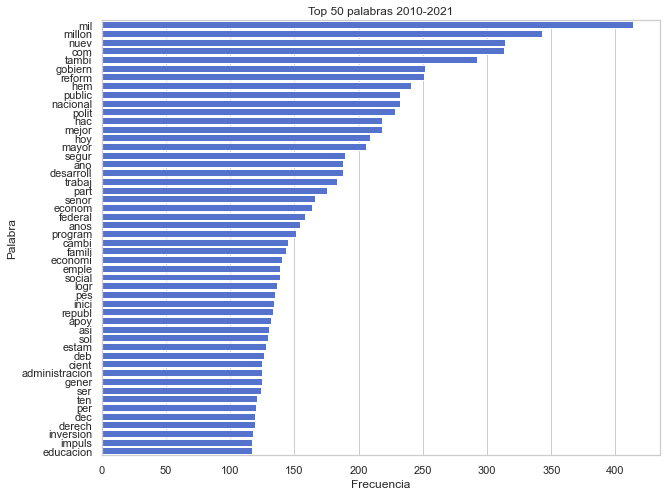

In [23]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,8))

ax8=sns.barplot(x='Frecuencia', y='Palabra', data=plot_counts8.sort_values(ascending=False, by='Frecuencia'), color='royalblue')
ax8.set_title('Top 50 palabras 2010-2021')

In [24]:
#total palabras únicas
counts.columns.shape[0]

14992

In [25]:
#total palabras
counts.sum(axis=0).sum()

823134

In [26]:
counts.sum(axis=0).sort_values(ascending=False).head(50)

mil              6743
millon           5817
nacional         5691
com              5417
nuev             4278
trabaj           3836
gobiern          3819
social           3594
polit            3590
pes              3339
public           3286
ano              3193
mejor            3042
econom           3021
desarroll        2995
puebl            2767
federal          2657
servici          2625
%                2528
hac              2497
hem              2477
part             2442
import           2383
program          2366
deb              2334
mayor            2317
sol              2229
$                2205
product          2198
ser              2177
aument           2155
nacion           2105
ley              2017
sistem           1953
asi              1942
tambi            1909
inici            1895
anos             1866
produccion       1864
sobr             1846
obras            1829
inversion        1828
cient            1803
internacional    1781
esfuerz          1775
realiz    

## Mismo top 50 ?

In [27]:
df_list = [plot_counts1,plot_counts2,plot_counts3,plot_counts4,plot_counts5,plot_counts6,plot_counts7]

#concat para la interseccion de multiples dataframes
int_df = pd.concat(df_list, axis=0, join='inner')

In [28]:
a=int_df.drop_duplicates(subset=['Palabra'])

In [29]:
int_df

,Palabra,Frecuencia
0,administracion,392
1,ano,271
2,anos,380
3,apoy,513
4,asi,339
...,...,...
45,social,135
46,sol,197
47,tambi,114
48,ten,161


In [30]:
a

,Palabra,Frecuencia
0,administracion,392
1,ano,271
2,anos,380
3,apoy,513
4,asi,339
5,cambi,320
6,cient,754
7,com,344
8,deb,287
9,dec,368
